In [207]:
#
!pip install category_encoders
#
!pip install openml
#
!pip install xgboost
#
!pip install lightgbm
#
!pip install catboost

# 1. Data Manipulation and Analysis
import numpy as np
import pandas as pd

# 2. Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as mn

# 3. Data Preprocessing
import re
import pickle
import datetime as dt
import math

# 4. Encoding Categorical Variables
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# 5. Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

# Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# 6. Model Evaluation Metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as pre
from sklearn.metrics import recall_score as rec
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr

# 7. Model Selection and Hyperparameter Tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 8. Datasets
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
import openml.datasets as datasets
import requests as r

# 9. Text Data Processing
from sklearn.feature_extraction.text import TfidfVectorizer

In [208]:
crop=pd.read_csv("/content/drive/MyDrive/Study/GitHub/Machine Learning Projects/Completed/Crop_Recommendation_System/crop_recommendation.csv")

In [209]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [210]:
crop.shape

(2200, 8)

In [211]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [212]:
crop.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [213]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [214]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [215]:
crop.duplicated().sum()

0

In [216]:
crop.describe(include='object')

,label
count,2200
unique,22
top,rice
freq,100


In [217]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#**Exploring Data**

In [218]:
num=crop.select_dtypes(include=["int64","float64"])
corr=num.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


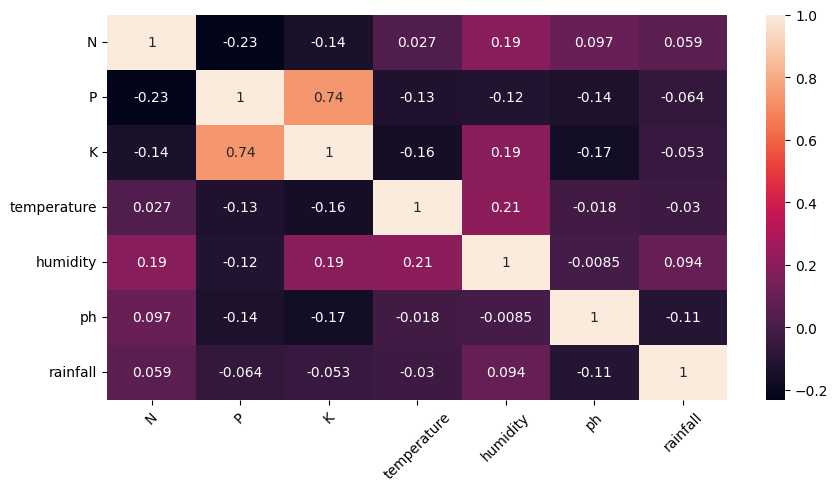

In [219]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)
plt.xticks(rotation=45)
plt.show();

In [220]:
crop['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [221]:
crop["label"].nunique()

22

<Axes: xlabel='label'>

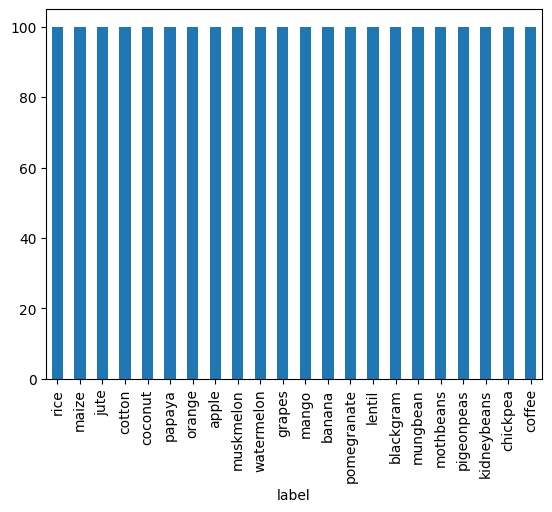

In [222]:
crop['label'].value_counts().plot(kind='bar')

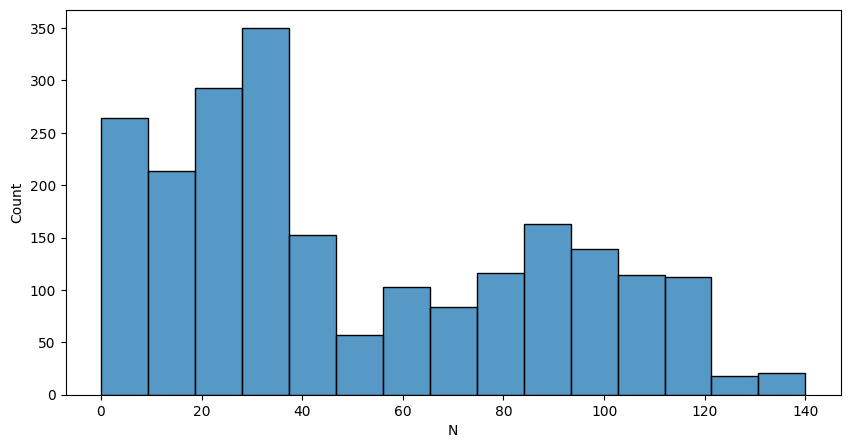

In [223]:
plt.figure(figsize=(10,5))
sns.histplot(crop['N'])
plt.show();

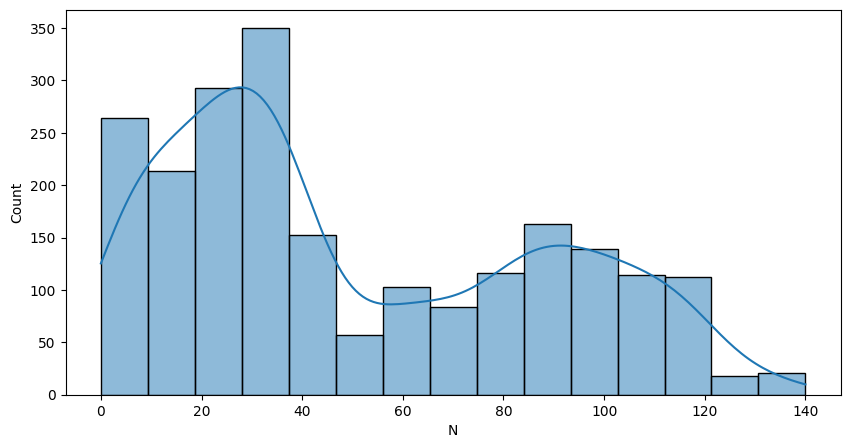

In [224]:
plt.figure(figsize=(10,5))
sns.histplot(crop['N'],kde=True)
plt.show();

In [225]:
crop_dic = {
    "rice": 0,
    "maize": 1,
    "jute": 2,
    "cotton": 3,
    "coconut": 4,
    "papaya": 5,
    "orange": 6,
    "apple": 7,
    "muskmelon": 8,
    "watermelon": 9,
    "grapes": 10,
    "mango": 11,
    "banana": 12,
    "pomegranate": 13,
    "lentil": 14,
    "blackgram": 15,
    "mungbean": 16,
    "mothbeans": 17,
    "pigeonpeas": 18,
    "kidneybeans": 19,
    "chickpea": 20,
    "coffee": 21
}

In [226]:
crop['crop_num'] = crop['label'].map(crop_dic)

In [227]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0


#**Train Test Split**

In [228]:
x=crop.drop(['label','crop_num'],axis=1)
y=crop['crop_num']

In [229]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [230]:
x_train.shape

(1760, 7)

In [231]:
x_test.shape

(440, 7)

In [232]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [233]:
y_train

,crop_num
1656,6
752,15
892,14
1041,12
1179,11
...,...
1638,6
1095,12
1130,11
1294,10


In [234]:
y_test

,crop_num
1451,8
1334,9
1761,5
1735,5
1576,7
...,...
59,0
71,0
1908,3
1958,3


In [235]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   crop_num     2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


#**Scale the features using MinMaxScaler (0-1)**

In [236]:
ms=MinMaxScaler()

In [237]:
x_train=ms.fit_transform(x_train)
x_test=ms.transform(x_test)

In [238]:
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

#**Standarization (mean 0 , sd 1)**

In [239]:
sc=StandardScaler()

In [240]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [241]:
x_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [242]:
x_test

array([[ 1.34934948, -1.0960582 , -0.02225388, ...,  1.05232434,
        -0.37619899, -1.38984486],
       [ 1.26889319, -1.36698971,  0.05607978, ...,  0.67956909,
        -0.28013033, -0.96895253],
       [ 0.22296144,  0.25859933,  0.01691295, ...,  0.98974316,
         0.60209743,  0.22056087],
       ...,
       [ 1.88572474, -0.19295318, -0.62933977, ...,  0.35134079,
         1.61311363, -0.54905776],
       [ 1.75163092, -0.04243567, -0.57058952, ...,  0.1731198 ,
        -0.46741089, -0.64767698],
       [-1.22525175,  0.43922034, -0.55100611, ..., -1.74645651,
        -0.45817577,  0.95946086]])

In [243]:
y_train

,crop_num
1656,6
752,15
892,14
1041,12
1179,11
...,...
1638,6
1095,12
1130,11
1294,10


In [244]:
y_test

,crop_num
1451,8
1334,9
1761,5
1735,5
1576,7
...,...
59,0
71,0
1908,3
1958,3


#**Training Models**

In [245]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Ridge Classifier': RidgeClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'XGBoost Classifier': XGBClassifier(),
    'LightGBM Classifier': LGBMClassifier(verbosity=-1),
    'CatBoost Classifier': CatBoostClassifier(verbose=0),
    'MLP Classifier': MLPClassifier(max_iter=1000),
    'Bagging Classifier': BaggingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()  # KNN can be used for both classification and regression
}

In [246]:
best_model_name = None
best_accuracy = 0

for name, md in models.items():
    md.fit(x_train, y_train)
    ypred = md.predict(x_test)
    accuracy = acc(y_test, ypred)

    # print(f"{name} with accuracy: {accuracy}")

    # Check if the current model has the highest accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = md

print(f"\nBest model: {best_model_name} with accuracy: {best_accuracy}")

def crop_recommendation(N,P,K,temperature,humidity,ph,rainfall):
  input_data = np.array([[N,P,K,temperature,humidity,ph,rainfall]]).astype(np.float64)
  input_data_scaled = ms.transform(input_data)
  input_data_scaled = sc.transform(input_data)
  prediction = best_model_name.predict(input_data_scaled)
  return prediction[0]


try:
    N = float(input("Enter nitrogen level (N): "))
    P = float(input("Enter phosphorus level (P): "))
    K = float(input("Enter potassium level (K): "))
    temperature = float(input("Enter temperature: "))
    humidity = float(input("Enter humidity: "))
    ph = float(input("Enter pH level: "))
    rainfall = float(input("Enter rainfall: "))

    # Call the crop recommendation function with user inputs
    prediction = crop_recommendation(N, P, K, temperature, humidity, ph, rainfall)

    if prediction in crop_dic:
        crop = crop_dic[prediction]
        print("{} is a best crop to be cultivated ".format(crop))
    else:
        print("Sorry we are not able to recommend a proper crop for this environment")

except ValueError:
    print("Invalid input! Please enter numerical values.")


Best model: GaussianNB() with accuracy: 0.9954545454545455
Enter nitrogen level (N): 10
Enter phosphorus level (P): 20
Enter potassium level (K): 20
Enter temperature: 45
Enter humidity: 35
Enter pH level: 7
Enter rainfall: 80
Sorry are not able to recommend a proper crop for this environment


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


#**Predictive System**

In [247]:
# def crop_recommendation(N,P,K,temperature,humidity,ph,rainfall):
#   input_data = np.array([[N,P,K,temperature,humidity,ph,rainfall]]).astype(np.float64)
#   input_data_scaled = ms.transform(input_data)
#   input_data_scaled = sc.transform(input_data)
#   prediction = best_model_name.predict(input_data_scaled)
#   print(prediction)

In [248]:
pickle.dump(best_model_name,open('model.pkl','wb'))
pickle.dump(ms,open("/content/drive/MyDrive/Study/GitHub/Machine Learning Projects/Completed/Crop_Recommendation_System/minmaxscaler.pkl",'wb'))
pickle.dump(sc,open("/content/drive/MyDrive/Study/GitHub/Machine Learning Projects/Completed/Crop_Recommendation_System/standscaler.pkl",'wb'))